##  Task 3: Linear Regression
##  Objective: Implement and understand simple & multiple linear regression. 

In [8]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
from sklearn.preprocessing import LabelEncoder


df= pd.read_csv('C:\\Users\\prach\\Downloads\\Housing.csv')


In [6]:

df.head(10)


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [27]:
# Encode categorial columns
# converinting 'yes' and 'no' into '0' and '1'

cat_cols = ['mainroad',	'guestroom',	'basement',	'hotwaterheating',	'airconditioning', 'prefarea',	'furnishingstatus']
le = LabelEncoder()

for cols in cat_cols:
    df[cols] = le.fit_transform(df[cols])

#OneHotEncode 'Furnishing status' 
df = pd.get_dummies(df, columns=[ 'furnishingstatus'], drop_first= True)

# check for missing values 
print(df.isnull().sum())
df.dropna(inplace = True)  # drop  rows with missing values if any \


price                 0
area                  0
bedrooms              0
bathrooms             0
stories               0
mainroad              0
guestroom             0
basement              0
hotwaterheating       0
airconditioning       0
parking               0
prefarea              0
furnishingstatus_1    0
furnishingstatus_2    0
dtype: int64


In [ ]:
# means there are no values missing in any of the column 

In [28]:
# feature selection and Train-Test split 
X = df.drop(columns=['price'])   #  all features except target 
Y = df['price']                 # Target variable 

X_train, X_test,  Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state = 42) 


In [29]:
# train the  Linearregression model 

model = LinearRegression()
model.fit(X_train,Y_train)

#predictions
Y_pred = model.predict(X_test)

#asking the model:
# fromabove line , we are asking that
#Based on what you've learned from X_train and y_train, what are the predicted values for X_test?”

In [30]:
# evalute the model 

print("Model Evaluation: ")
print("Mean absolute error (MAE):", mean_absolute_error(Y_test,Y_pred))  # MAE: closer to 0 , much better 
print("Mean squared Error(MSE): ", mean_squared_error(Y_test,Y_pred))  # MSE: othe lower is better 
print("R^2 score: ",r2_score(Y_test,Y_pred)) # ranges from 0 to 1, closer to 1 is better , can be -ve if model is very bad 

# MAE: averge of absolute differnce between predicted and actual values 
# MSE: average of squared differnces (penalizes larger errors more than MAE). 
# R^2 : (coefficient of determination )  measures hoe well the model explains the variability of the output


Model Evaluation: 
Mean absolute error (MAE): 970043.4039201637
Mean squared Error(MSE):  1754318687330.6628
R^2 score:  0.6529242642153186


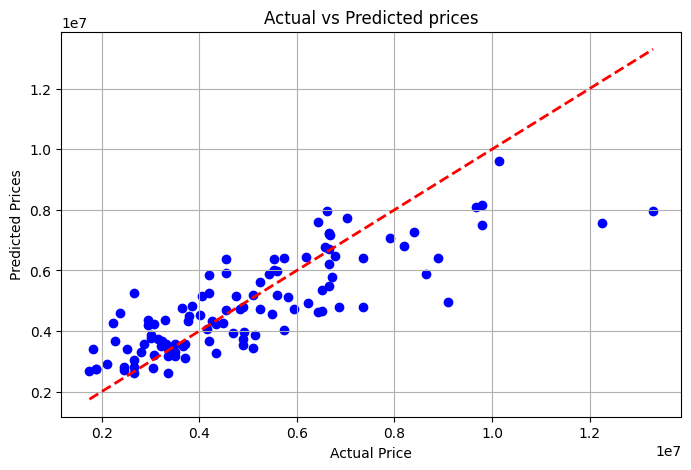

In [31]:
#  plot actual vs prideicted prices 

plt.figure(figsize = (8,5))
plt.scatter(Y_test, Y_pred, color='blue')
plt.plot([Y.min(),Y.max()], [Y.min(), Y.max()], 'r--', lw = 2)   # draw a red dash refernce line  representing y = x (i.e perfect preditions)
 # r -- mean color and style  ( dash line , lw = 2 set line width thicker line for betetr )
plt.xlabel('Actual Price')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted prices')
plt.grid(True)  # add grid lines make it eaiser to interpret the data points
plt.show()

# these dots close to straight line that means good predictions

In [32]:
# coefficicent Interpretation 

coefficients = pd.DataFrame({
    'Feature':X.columns,
    'Coefficient': model.coef_
})

print(coefficients)

               Feature   Coefficient
0                 area  2.359688e+02
1             bedrooms  7.677870e+04
2            bathrooms  1.094445e+06
3              stories  4.074766e+05
4             mainroad  3.679199e+05
5            guestroom  2.316100e+05
6             basement  3.902512e+05
7      hotwaterheating  6.846499e+05
8      airconditioning  7.914267e+05
9              parking  2.248419e+05
10            prefarea  6.298906e+05
11  furnishingstatus_1 -1.268818e+05
12  furnishingstatus_2 -4.136451e+05


 ## Conclusion 
 
 * Applied simple and multiple linear regression using the housing prices predictiondataset.
 * Used Scikit-learn for model building and evaluation.
 * handled categorial variables using Label Encoding  and One-Hot Encoding.
 * Trained the model and evaluated it using MAE,MSE, R^2 score.
 * Interpreted regression coefficients to understand the effect of each feature.
 * Gained practical understanding of regression modeling and evaluation techniques. 
